<a href="https://colab.research.google.com/github/balla-a/multistat/blob/main/MultiStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import seaborn as sn
import matplotlib.pyplot as plt
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Setting working directory

os.chdir('/content/drive/MyDrive/CEU/Multivariate statistics')
!pwd

/content/drive/MyDrive/CEU/Multivariate statistics


# **Data pre-processing**

In [ ]:
# Opening the databese

df = pd.read_csv("ESS9_HU.csv")
df

,idno,ppltrst,pplfair,pplhlp,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,...,vote,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gndr,agea,region
0,118,5,3,5,5,5,7,2,2,5,...,1,4,3,3,3,3,2,2,37,HU223
1,182,5,10,5,3,3,9,5,4,8,...,1,3,0,4,5,5,2,2,70,HU323
2,220,4,6,5,1,6,8,5,5,9,...,1,7,2,0,1,88,4,2,67,HU110
3,234,1,0,2,1,3,10,7,6,10,...,1,1,1,1,2,2,2,1,38,HU332
4,239,7,6,7,1,2,6,1,1,3,...,1,3,1,2,0,2,0,1,30,HU331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,69733,5,5,3,5,6,6,3,3,7,...,2,6,6,5,5,7,6,2,28,HU321
1657,69763,5,5,5,7,8,8,2,1,4,...,1,6,3,3,4,2,1,2,30,HU211
1658,69782,3,4,3,3,3,6,4,5,6,...,1,5,4,5,5,5,3,2,79,HU110
1659,69846,0,0,0,0,0,10,6,6,8,...,1,1,1,1,3,3,2,1,73,HU332


In [ ]:
# Dropping unnecessary columns

print(df.columns)
df.drop(['idno', 'vote', 'gndr', 'agea', 'region'],axis=1,inplace=True)
#df.drop(['ppltrst','pplfair','pplhlp','stflife','stfeco','stfgov','stfdem','stfedu','stfhlth'],axis=1,inplace=True)
df.info()


Index(['idno', 'ppltrst', 'pplfair', 'pplhlp', 'trstprl', 'trstlgl', 'trstplc',
       'trstplt', 'trstprt', 'trstep', 'trstun', 'vote', 'stflife', 'stfeco',
       'stfgov', 'stfdem', 'stfedu', 'stfhlth', 'gndr', 'agea', 'region'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ppltrst  1661 non-null   int64
 1   pplfair  1661 non-null   int64
 2   pplhlp   1661 non-null   int64
 3   trstprl  1661 non-null   int64
 4   trstlgl  1661 non-null   int64
 5   trstplc  1661 non-null   int64
 6   trstplt  1661 non-null   int64
 7   trstprt  1661 non-null   int64
 8   trstep   1661 non-null   int64
 9   trstun   1661 non-null   int64
 10  stflife  1661 non-null   int64
 11  stfeco   1661 non-null   int64
 12  stfgov   1661 non-null   int64
 13  stfdem   1661 non-null   int64
 14  stfedu   1661 non-null   int64
 15  stfhlth  1661 non-nul

In [ ]:
df

,ppltrst,pplfair,pplhlp,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth
0,5,3,5,5,5,7,2,2,5,7,4,3,3,3,3,2
1,5,10,5,3,3,9,5,4,8,88,3,0,4,5,5,2
2,4,6,5,1,6,8,5,5,9,10,7,2,0,1,88,4
3,1,0,2,1,3,10,7,6,10,10,1,1,1,2,2,2
4,7,6,7,1,2,6,1,1,3,2,3,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,5,5,3,5,6,6,3,3,7,6,6,6,5,5,7,6
1657,5,5,5,7,8,8,2,1,4,6,6,3,3,4,2,1
1658,3,4,3,3,3,6,4,5,6,7,5,4,5,5,5,3
1659,0,0,0,0,0,10,6,6,8,10,1,1,1,3,3,2


# **Factor analysis**

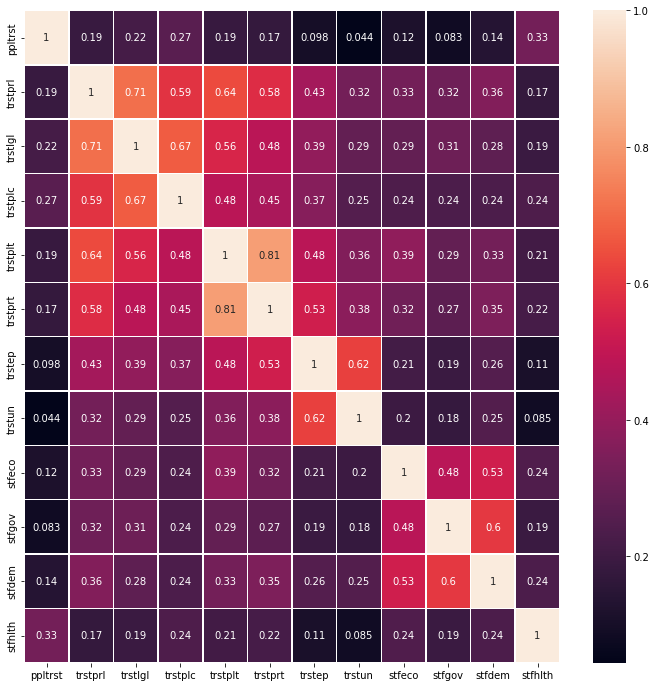

In [ ]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(12,12)) 
sn.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()


In [ ]:
# Bartlett's test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(8815.070555962844, 0.0)

In [ ]:
# KMO test

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8376471697829668

In [ ]:
?FactorAnalyzer

In [ ]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(rotation="varimax", method="principal", impute = "drop", n_factors=df.shape[1])
fa.fit(df)

# Check Eigenvalues

ev, v = fa.get_eigenvalues()
ev

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


array([4.83154079, 1.48336156, 1.261207  , 0.97462812, 0.73949686,
       0.64701348, 0.51732021, 0.39580716, 0.37724117, 0.34629061,
       0.25699112, 0.16910193])

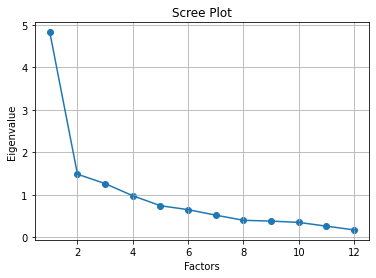

In [ ]:
# Create scree plot using matplotlib

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Factor loadings

fa = FactorAnalyzer(rotation="varimax", method="principal", 
                    impute = "drop", n_factors=3)
fa.fit(df)
pd.DataFrame(fa.loadings_,index=df.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


,0,1,2
ppltrst,0.089389,0.010963,0.740436
trstprl,0.738728,0.203851,0.293500
trstlgl,0.696410,0.128644,0.388009
trstplc,0.631132,0.055532,0.473466
trstplt,0.772537,0.231446,0.203804
trstprt,0.768064,0.220249,0.147624
trstep,0.775569,0.122876,-0.164754
trstun,0.656060,0.169875,-0.288809
stfeco,0.197909,0.757179,0.132373
stfgov,0.151010,0.812043,0.078538


In [ ]:
# Variance Explained by Factors

print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          2.126162  1.832286  1.524187  1.407855
Proportional Var  0.177180  0.152691  0.127016  0.117321
Cumulative Var    0.177180  0.329871  0.456886  0.574208


In [ ]:
# Communalities 

print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

         Communalities
ppltrst       0.076744
trstprl       0.663127
trstlgl       0.799512
trstplc       0.570944
trstplt       0.995000
trstprt       0.696789
trstep        0.866210
trstun        0.448305
stfeco        0.441898
stfgov        0.518846
stfdem        0.707359
stfhlth       0.105756


In [ ]:
# 2nd round

df.drop(['pplhlp', 'stflife', 'stfedu', 'pplfair'],axis=1,inplace=True)

In [ ]:
# The Horn's parallel analysis

def _HornParallelAnalysis(data, K=10, printEigenvalues=False):
    ################
    # Create a random matrix to match the dataset
    ################
    n, m = data.shape
    # Set the factor analysis parameters
    fa = FactorAnalyzer(n_factors=1, method='minres', rotation=None, use_smc=True)
    # Create arrays to store the values
    sumComponentEigens = np.empty(m)
    sumFactorEigens = np.empty(m)
    # Run the fit 'K' times over a random matrix
    for runNum in range(0, K):
        fa.fit(np.random.normal(size=(n, m)))
        sumComponentEigens = sumComponentEigens + fa.get_eigenvalues()[0]
        sumFactorEigens = sumFactorEigens + fa.get_eigenvalues()[1]
    # Average over the number of runs
    avgComponentEigens = sumComponentEigens / K
    avgFactorEigens = sumFactorEigens / K

    ################
    # Get the eigenvalues for the fit on supplied data
    ################
    fa.fit(data)
    dataEv = fa.get_eigenvalues()
    # Set up a scree plot
    plt.figure(figsize=(8, 6))

    ################
    ### Print results
    ################
    if printEigenvalues:
        print('Principal component eigenvalues for random matrix:\n', avgComponentEigens)
        print('Factor eigenvalues for random matrix:\n', avgFactorEigens)
        print('Principal component eigenvalues for data:\n', dataEv[0])
        print('Factor eigenvalues for data:\n', dataEv[1])
    # Find the suggested stopping points
    suggestedFactors = sum((dataEv[1] - avgFactorEigens) > 0)
    suggestedComponents = sum((dataEv[0] - avgComponentEigens) > 0)
    print('Parallel analysis suggests that the number of factors = ', suggestedFactors , ' and the number of components = ', suggestedComponents)


    ################
    ### Plot the eigenvalues against the number of variables
    ################
    # Line for eigenvalue 1
    plt.plot([0, m+1], [1, 1], 'k--', alpha=0.3)
    # For the random data - Components
    plt.plot(range(1, m+1), avgComponentEigens, 'b', label='PC - random', alpha=0.4)
    # For the Data - Components
    plt.scatter(range(1, m+1), dataEv[0], c='b', marker='o')
    plt.plot(range(1, m+1), dataEv[0], 'b', label='PC - data')
    # For the random data - Factors
    plt.plot(range(1, m+1), avgFactorEigens, 'g', label='FA - random', alpha=0.4)
    # For the Data - Factors
    plt.scatter(range(1, m+1), dataEv[1], c='g', marker='o')
    plt.plot(range(1, m+1), dataEv[1], 'g', label='FA - data')
    plt.title('Parallel Analysis Scree Plots', {'fontsize': 20})
    plt.xlabel('Factors/Components', {'fontsize': 15})
    plt.xticks(ticks=range(1, m+1), labels=range(1, m+1))
    plt.ylabel('Eigenvalue', {'fontsize': 15})
    plt.legend()
    plt.show();


Parallel analysis suggests that the number of factors =  5  and the number of components =  3


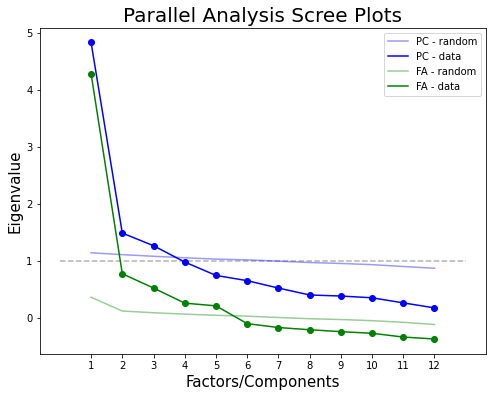

In [ ]:
_HornParallelAnalysis(df)